In [1]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf
import time
import optuna
import pandas as pd
import matplotlib.pyplot as plt

# argmax option

In [ ]:
"""armax sort"""
def plot_original(total_plants):
    plt.bar(range(len(total_plants)), list(total_plants.values()), align='center')
    plt.xticks(range(len(total_plants)), list(range(len(total_plants))))
    plt.show()

df = pd.read_csv('D:\\My Drive\\StoragePath\\Datasets\\tal_datesets\\corn_data_set\\phenotyping.csv')  
df_data = df.drop(['Y_cropped', 'plot', 'SampleDate'], axis=1)
# count plants per phenotype
total_plants = {}
for count, column in enumerate(df_data):
    total = np.sum(df_data[column] > 1)
    total_plants[column] = total
plot_original(total_plants) 

#originaly set group to max phenotype
df_max = np.argmax(np.array(df_data), axis=1)
df_data["group"] = df_max + 1
# no phenotypes -> group 0
df_group = df_data[(df_data['necrosis'] == 1) & (df_data['Burning'] == 1) & (df_data['Bleaching'] == 1) & (df_data['Chlorosis'] == 1) & (df_data['Epinasty curling'] == 1) & (df_data['Inhibited growth'] == 1) & (df_data['Wilting'] == 1) & (df_data['Disturbed apical bud-> abnormal '] == 1) ]
df_data.loc[df_group.index,"group"] = 0
#set group for low proportion phenotypes
df_data.loc[df['Burning'] > 1, 'group'] = 2
df_data.loc[df['Epinasty curling'] > 1, 'group'] = 5
df_data.loc[df['Bleaching'] > 1, 'group'] = 3
#take from 6 to other groups
df_group = df_data.loc[(df_data["Wilting"] > 1) & (df_data["group"] == 6) , :]
df_data.iloc[df_group[0:30].index, 8] = 7
df_group = df_data.loc[(df_data["Disturbed apical bud-> abnormal "] > 1) & (df_data["group"] == 6) , :]
df_data.iloc[df_group[0:40].index, 8] = 8

#check stats
df_stats = pd.DataFrame(columns=['total', 'assigned', 'precent'])
df_stats['assigned'] = df_data["group"].value_counts().sort_index() 
df_stats['total'] = np.insert(np.asarray(list(total_plants.values())),0,df_stats.loc[0,'assigned'])
df_stats['precent'] = df_stats['assigned'] / df_stats['total']
df["group"] = df_data["group"]

df_data.to_csv('D:\\My Drive\\StoragePath\\ExpResults\\tal_exp_results\\results\\label_groups.csv',index=False)
df_stats.to_csv('D:\\My Drive\\StoragePath\\ExpResults\\tal_exp_results\\results\\label_groups_stats.csv',index=False)
df.to_csv('D:\\My Drive\\StoragePath\\ExpResults\\tal_exp_results\\results\\phenotyping_with_groups.csv',index=False)

# argmax option

In [ ]:
"""argsparse option"""

# test

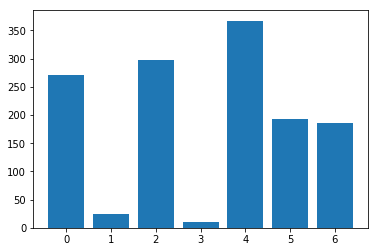

0
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
1
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
2
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
3
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
4
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
5
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
6
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
7
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
8
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
9
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
10
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
11
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
12
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
13
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
14
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
15
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
16
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
17
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
18
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
19
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
20
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
21
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
22
1.0 4
2.0 2
3.0 7

1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
217
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
218
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
219
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
220
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
221
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
222
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
223
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
224
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
225
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
226
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
227
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
228
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
229
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
230
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
231
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
232
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
233
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
234
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
235
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
236
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
237
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 

1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
445
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
446
1.0 4
2.0 2
3.0 7
447
1.0 4
2.0 2
3.0 7
448
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
449
1.0 4
2.0 2
450
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
451
1.0 4
2.0 2
3.0 7
452
1.0 4
2.0 2
3.0 7
4.0 6
453
1.0 4
2.0 2
3.0 7
454
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
455
1.0 4
2.0 2
456
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
457
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
458
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
459
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
460
1.0 4
2.0 2
3.0 7
4.0 6
461
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
462
1.0 4
2.0 2
3.0 7
463
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
464
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
465
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
466
1.0 4
2.0 2
3.0 7
4.0 6
467
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
468
1.0 4
2.0 2
3.0 7
4.0 6
469
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
470
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
471
1.0 4
2.0 2
3.0 7
4.0 6
472
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
473
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
474
1.0 4
2.0 2
3.0 7
4.0 6
475
1.0 4


In [71]:
def plot_original(total_plants):
    plt.bar(range(len(total_plants)), list(total_plants.values()), align='center')
    plt.xticks(range(len(total_plants)), list(range(len(total_plants))))
    plt.show()

df = pd.read_csv('D:\\My Drive\\StoragePath\\Datasets\\tal_datesets\\corn_data_set\\phenotyping.csv')  
df_data = df.drop(['Y_cropped', 'plot', 'SampleDate', 'Bleaching'], axis=1)
# count plants per phenotype
total_plants = {}
for count, column in enumerate(df_data):
    total = np.sum(df_data[column] > 1)
    total_plants[column] = total
plot_original(total_plants) 

# no phenotypes -> group 0
df_data["group"] = ""
df_group = df_data[(df_data['necrosis'] == 1) & (df_data['Burning'] == 1) & (df_data['Chlorosis'] == 1) & (df_data['Epinasty curling'] == 1) & (df_data['Inhibited growth'] == 1) & (df_data['Wilting'] == 1) & (df_data['Disturbed apical bud-> abnormal '] == 1) ]
df_data.loc[df_group.index,"group"] = 0
total_healthy = len(df_group.index)

# plants per phenotype
df_stats = pd.DataFrame(columns=['total','proportion' 'assigned', 'precent'])
plants_per_phenotype = np.asarray(list(total_plants.values()))
# plants_per_phenotype = plants_per_phenotype[plants_per_phenotype != 1]   #delete bleaching
df_stats['total'] = np.insert(plants_per_phenotype,0,total_healthy)

#rank phenotypes
total_phenotypes = df_stats['total'].sum(axis=0)
df_stats['proportion'] = df_stats['total'] / total_phenotypes 
df_stats['rank'] = df_stats['proportion'].rank()
df_stats = df_stats.sort_values(by=['rank'])

#set groups by rank
for index, row in df_data.iterrows():
    print(index)   
    for ind in df_stats.drop(index=0).index: 
        print(df_stats['rank'][ind], ind)
        if (df_data.iloc[index, ind - 1] > 1) :
            df_data.loc[index, 'group'] =  ind
            break
            
#check stats
df_stats = df_stats.sort_index()
df_stats['assigned'] = df_data["group"].value_counts().sort_index()
df_stats['precent'] = df_stats['assigned'] / df_stats['total']
df_stats = df_stats.drop('proportionassigned', axis=1)  
df["group"] = df_data["group"]

df_data.to_csv('D:\\My Drive\\StoragePath\\ExpResults\\tal_exp_results\\results\\label_groups_sparse.csv',index=False)
df_stats.to_csv('D:\\My Drive\\StoragePath\\ExpResults\\tal_exp_results\\results\\label_groups_stats_sparse.csv',index=False)
df.to_csv('D:\\My Drive\\StoragePath\\ExpResults\\tal_exp_results\\results\\phenotyping_with_groups_sparse.csv',index=False)

In [ ]:
# example from task 2
        """split to train validation"""
        # train_indices = np.random.choice(self.x_train.shape[0], int(self.x_train.shape[0] * 0.8), replace=False)
        # x_train = self.x_train[train_indices]
        # y_train = self.y_train[train_indices]
        # x_val = np.delete(self.x_train, train_indices, 0)
        # y_val = np.delete(self.y_train, train_indices, 0)

In [1]:
""" binary option"""


def plot_original(total_plants):
    plt.bar(range(len(total_plants)), list(total_plants.values()), align='center')
    plt.xticks(range(len(total_plants)), list(range(len(total_plants))))
    plt.show()

df = pd.read_csv('D:\\My Drive\\StoragePath\\Datasets\\tal_datesets\\corn_data_set\\phenotyping.csv')
df_data = df.drop(['Y_cropped', 'plot', 'SampleDate', 'Bleaching'], axis=1)
# count plants per phenotype
total_plants = {}
for count, column in enumerate(df_data):
    total = np.sum(df_data[column] > 1)
    total_plants[column] = total
plot_original(total_plants)

# no phenotypes -> group 0
df_data["group"] = ""
df_group = df_data[(df_data['necrosis'] == 1) & (df_data['Burning'] == 1) & (df_data['Chlorosis'] == 1) & (df_data['Epinasty curling'] == 1) & (df_data['Inhibited growth'] == 1) & (df_data['Wilting'] == 1) & (df_data['Disturbed apical bud-> abnormal '] == 1) ]
df_data.loc[df_group.index,"group"] = 0
total_healthy = len(df_group.index)

# plants per phenotype
df_stats = pd.DataFrame(columns=['total','proportion' 'assigned', 'precent'])
plants_per_phenotype = np.asarray(list(total_plants.values()))
# plants_per_phenotype = plants_per_phenotype[plants_per_phenotype != 1]   #delete bleaching
df_stats['total'] = np.insert(plants_per_phenotype,0,total_healthy)

#rank phenotypes
total_phenotypes = df_stats['total'].sum(axis=0)
df_stats['proportion'] = df_stats['total'] / total_phenotypes
df_stats['rank'] = df_stats['proportion'].rank()
df_stats = df_stats.sort_values(by=['rank'])

#set groups by rank
for index, row in df_data.iterrows():
    print(index)
    for ind in df_stats.drop(index=0).index:
        print(df_stats['rank'][ind], ind)
        if (df_data.iloc[index, ind - 1] > 1) :
            df_data.loc[index, 'group'] =  ind
            break

#check stats
df_stats = df_stats.sort_index()
df_stats['assigned'] = df_data["group"].value_counts().sort_index()
df_stats['precent'] = df_stats['assigned'] / df_stats['total']
df_stats = df_stats.drop('proportionassigned', axis=1)
df["group"] = df_data["group"]

df_data.to_csv('D:\\My Drive\\StoragePath\\ExpResults\\tal_exp_results\\results\\label_groups_binary.csv',index=False)
df_stats.to_csv('D:\\My Drive\\StoragePath\\ExpResults\\tal_exp_results\\results\\label_groups_stats_binary.csv',index=False)
df.to_csv('D:\\My Drive\\StoragePath\\ExpResults\\tal_exp_results\\results\\phenotyping_with_groups_binary.csv',index=False)

NameError: name 'pd' is not defined

In [72]:
df_stats

,total,precent,proportion,rank,assigned
0,325,1.000000,0.194262,7.0,325
1,270,0.185185,0.161387,5.0,50
2,24,0.958333,0.014345,2.0,23
3,298,0.090604,0.178123,6.0,27
4,11,1.000000,0.006575,1.0,11
5,367,0.084469,0.219366,8.0,31
6,193,0.321244,0.115362,4.0,62
7,185,0.924324,0.110580,3.0,171


In [59]:
df_stats = df_stats.sort_index()

,total,proportionassigned,precent,proportion,rank
0,325,NaN,NaN,0.194262,7.0
1,270,NaN,NaN,0.161387,5.0
2,24,NaN,NaN,0.014345,2.0
3,298,NaN,NaN,0.178123,6.0
4,11,NaN,NaN,0.006575,1.0
5,367,NaN,NaN,0.219366,8.0
6,193,NaN,NaN,0.115362,4.0
7,185,NaN,NaN,0.110580,3.0


In [60]:
df_data["group"].value_counts().sort_index() 

0    325
1     50
2     23
3     27
4     11
5     31
6     62
7    171
Name: group, dtype: int64

In [54]:
df_stats

,total,proportionassigned,precent,proportion,rank
4,11,NaN,NaN,0.006575,1.0
2,24,NaN,NaN,0.014345,2.0
7,185,NaN,NaN,0.110580,3.0
6,193,NaN,NaN,0.115362,4.0
1,270,NaN,NaN,0.161387,5.0
3,298,NaN,NaN,0.178123,6.0
0,325,NaN,NaN,0.194262,7.0
5,367,NaN,NaN,0.219366,8.0


In [15]:
total_phenotypes = df_stats['proportion'].sum(axis=0)

In [29]:
 df_stats.sort_values(by=['rank']).iloc[0,:]

total                   1
assigned              NaN
precent               NaN
proportion    0.000597372
rank                    1
Name: 3, dtype: object

In [33]:
for row in df_stats:
    print(row)

total
assigned
precent
proportion
rank


In [47]:
df_stats = df_stats.iloc[1:]

,total,assigned,precent,proportion,rank
5,11,NaN,NaN,0.006571,2.0
2,24,NaN,NaN,0.014337,3.0
8,185,NaN,NaN,0.110514,4.0
7,193,NaN,NaN,0.115293,5.0
1,270,NaN,NaN,0.161290,6.0
4,298,NaN,NaN,0.178017,7.0
0,325,NaN,NaN,0.194146,8.0
6,367,NaN,NaN,0.219235,9.0


In [37]:
df_stats

,total,assigned,precent,proportion,rank
3,1,NaN,NaN,0.000597,1.0
5,11,NaN,NaN,0.006571,2.0
2,24,NaN,NaN,0.014337,3.0
8,185,NaN,NaN,0.110514,4.0
7,193,NaN,NaN,0.115293,5.0
1,270,NaN,NaN,0.161290,6.0
4,298,NaN,NaN,0.178017,7.0
0,325,NaN,NaN,0.194146,8.0
6,367,NaN,NaN,0.219235,9.0


In [56]:
df_stats.drop(index=0)

,total,proportionassigned,precent,proportion,rank
4,11,NaN,NaN,0.006575,1.0
2,24,NaN,NaN,0.014345,2.0
7,185,NaN,NaN,0.110580,3.0
6,193,NaN,NaN,0.115362,4.0
1,270,NaN,NaN,0.161387,5.0
3,298,NaN,NaN,0.178123,6.0
5,367,NaN,NaN,0.219366,8.0


In [ ]:
df_stats.index[df_stats["rank"] == 1].tolist()[0]

In [57]:
for index, row in df_data.iterrows():
    print(index)   
    for ind in df_stats.drop(index=0).index: 
        print(df_stats['rank'][ind], ind)
        if (df_data.iloc[index, ind - 1] > 1) :
            df_data.loc[index, 'group'] =  ind
            break
        

0
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
1
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
2
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
3
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
4
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
5
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
6
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
7
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
8
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
9
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
10
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
11
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
12
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
13
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
14
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
15
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
16
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
17
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
18
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
19
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
20
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
21
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
22
1.0 4
2.0 2
3.0 7

1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
211
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
212
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
213
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
214
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
215
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
216
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
217
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
218
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
219
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
220
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
221
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
222
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
223
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
224
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
225
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
226
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
227
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
228
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
229
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
230
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
231
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 

3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
478
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
479
1.0 4
2.0 2
3.0 7
480
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
481
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
482
1.0 4
2.0 2
3.0 7
483
1.0 4
2.0 2
484
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
485
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
486
1.0 4
2.0 2
3.0 7
487
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
488
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
489
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
490
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
491
1.0 4
2.0 2
492
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
493
1.0 4
2.0 2
3.0 7
494
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
495
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
496
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
497
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
498
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
499
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
6.0 3
8.0 5
500
1.0 4
2.0 2
3.0 7
501
1.0 4
2.0 2
3.0 7
502
1.0 4
2.0 2
503
1.0 4
2.0 2
3.0 7
4.0 6
504
1.0 4
2.0 2
3.0 7
505
1.0 4
2.0 2
3.0 7
506
1.0 4
2.0 2
3.0 7
4.0 6
5.0 1
507
1.0 4
2.0 2
3.0 7
4.0 

In [52]:
df_data

,necrosis,Burning,Bleaching,Chlorosis,Epinasty curling,Inhibited growth,Wilting,Disturbed apical bud-> abnormal,group
0,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,0
5,1,1,1,1,1,1,1,1,0
6,1,1,1,1,1,1,1,1,0
7,1,1,1,1,1,1,1,1,0
8,1,1,1,1,1,1,1,1,0
9,1,1,1,1,1,1,1,1,0


In [42]:
df_stats.index

Int64Index([3, 5, 2, 8, 7, 1, 4, 0, 6], dtype='int64')

In [49]:
plants_per_phenotype = np.asarray(list(total_plants.values()))
plants_per_phenotype = plants_per_phenotype[plants_per_phenotype != 1]

In [50]:
plants_per_phenotype[plants_per_phenotype != 1]

array([270,  24, 298,  11, 367, 193, 185], dtype=int64)

In [30]:
df_stats = df_stats.sort_values(by=['rank'])

In [18]:
df_stats['rank'] = df_stats['proportion'].rank()

In [25]:
df_stats.index[df_stats["rank"] == 1].tolist()[0]

3

In [46]:
for index, row in df_data.iterrows():
    print(row)

necrosis                            1
Burning                             1
Bleaching                           1
Chlorosis                           1
Epinasty curling                    1
Inhibited growth                    1
Wilting                             1
Disturbed apical bud-> abnormal     1
group                               0
Name: 0, dtype: object
necrosis                            1
Burning                             1
Bleaching                           1
Chlorosis                           1
Epinasty curling                    1
Inhibited growth                    1
Wilting                             1
Disturbed apical bud-> abnormal     1
group                               0
Name: 1, dtype: object
necrosis                            1
Burning                             1
Bleaching                           1
Chlorosis                           1
Epinasty curling                    1
Inhibited growth                    1
Wilting                             1
Dist

Name: 157, dtype: object
necrosis                            1
Burning                             1
Bleaching                           1
Chlorosis                           1
Epinasty curling                    1
Inhibited growth                    1
Wilting                             1
Disturbed apical bud-> abnormal     1
group                               0
Name: 158, dtype: object
necrosis                            1
Burning                             1
Bleaching                           1
Chlorosis                           1
Epinasty curling                    1
Inhibited growth                    1
Wilting                             1
Disturbed apical bud-> abnormal     1
group                               0
Name: 159, dtype: object
necrosis                            1
Burning                             1
Bleaching                           1
Chlorosis                           1
Epinasty curling                    1
Inhibited growth                    1
Wilting      

Name: 312, dtype: object
necrosis                            1
Burning                             1
Bleaching                           1
Chlorosis                           3
Epinasty curling                    1
Inhibited growth                    2
Wilting                             1
Disturbed apical bud-> abnormal     1
group                                
Name: 313, dtype: object
necrosis                            1
Burning                             2
Bleaching                           1
Chlorosis                           1
Epinasty curling                    1
Inhibited growth                    1
Wilting                             1
Disturbed apical bud-> abnormal     1
group                                
Name: 314, dtype: object
necrosis                            2
Burning                             1
Bleaching                           1
Chlorosis                           2
Epinasty curling                    1
Inhibited growth                    2
Wilting      

Name: 518, dtype: object
necrosis                            4
Burning                             1
Bleaching                           1
Chlorosis                           4
Epinasty curling                    1
Inhibited growth                    5
Wilting                             4
Disturbed apical bud-> abnormal     3
group                                
Name: 519, dtype: object
necrosis                            2
Burning                             1
Bleaching                           1
Chlorosis                           1
Epinasty curling                    1
Inhibited growth                    4
Wilting                             4
Disturbed apical bud-> abnormal     1
group                                
Name: 520, dtype: object
necrosis                            4
Burning                             1
Bleaching                           1
Chlorosis                           4
Epinasty curling                    1
Inhibited growth                    4
Wilting      

Name: 668, dtype: object
necrosis                            4
Burning                             1
Bleaching                           1
Chlorosis                           4
Epinasty curling                    1
Inhibited growth                    5
Wilting                             5
Disturbed apical bud-> abnormal     1
group                                
Name: 669, dtype: object
necrosis                            4
Burning                             1
Bleaching                           1
Chlorosis                           4
Epinasty curling                    1
Inhibited growth                    5
Wilting                             5
Disturbed apical bud-> abnormal     3
group                                
Name: 670, dtype: object
necrosis                            5
Burning                             1
Bleaching                           1
Chlorosis                           4
Epinasty curling                    1
Inhibited growth                    5
Wilting      

In [13]:
df_stats['proportion'] = df_stats['total'] / total_phenotypes 

In [14]:
df_stats['proportion']

0    0.194146
1    0.161290
2    0.014337
3    0.000597
4    0.178017
5    0.006571
6    0.219235
7    0.115293
8    0.110514
Name: proportion, dtype: float64

In [12]:
total_phenotypes

1674